In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [23]:
df.shape

(41188, 21)

In [24]:
df = df.drop_duplicates(keep='first')
df = df.loc[:,~df.columns.duplicated()]
df.shape

(41176, 21)

In [25]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('--'*21)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------------------
default
['no' 'unknown' 'yes']
------------------------------------------
housing
['no' 'yes' 'unknown']
------------------------------------------
loan
['no' 'yes' 'unknown']
------------------------------------------
contact
['telephone' 'cellular']
----

In [26]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [27]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

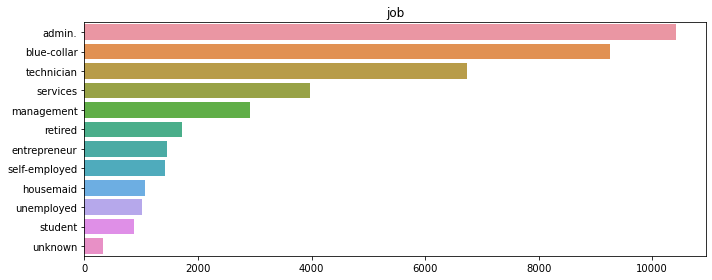

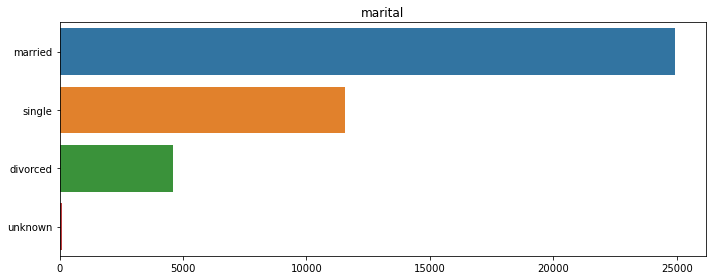

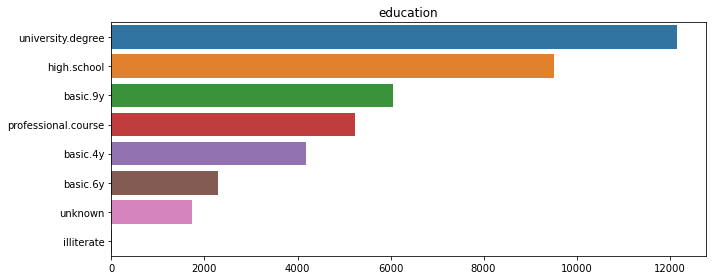

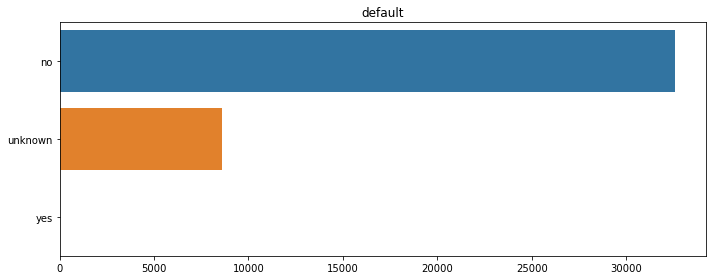

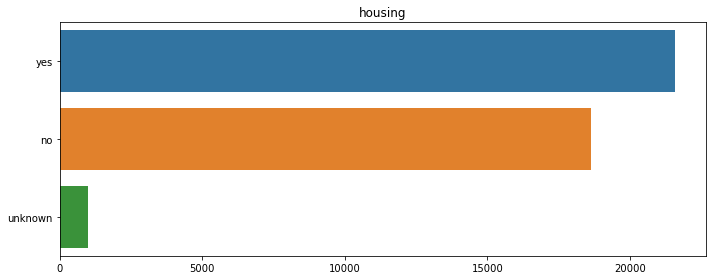

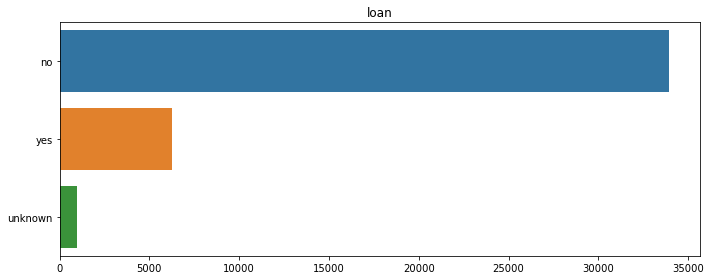

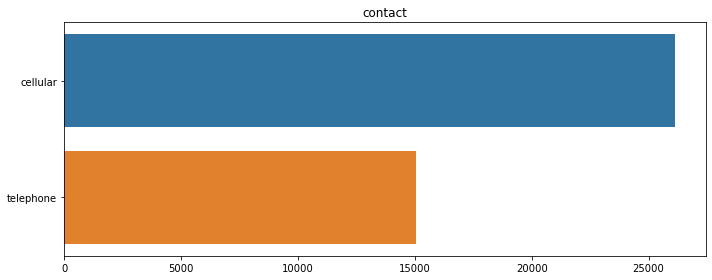

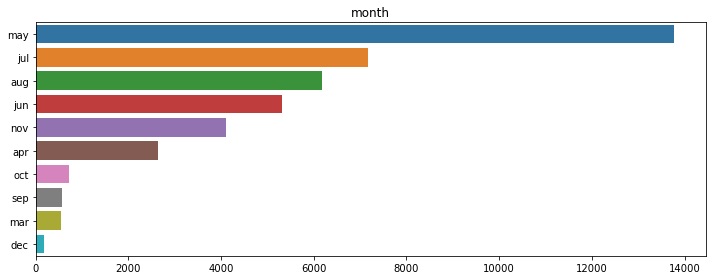

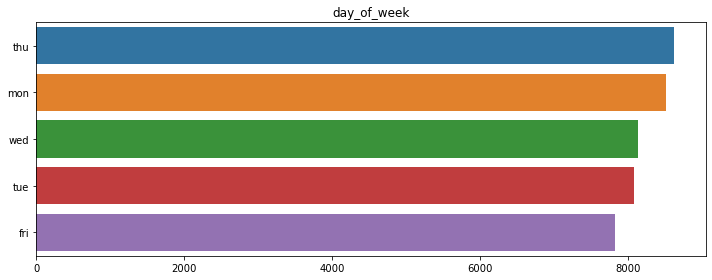

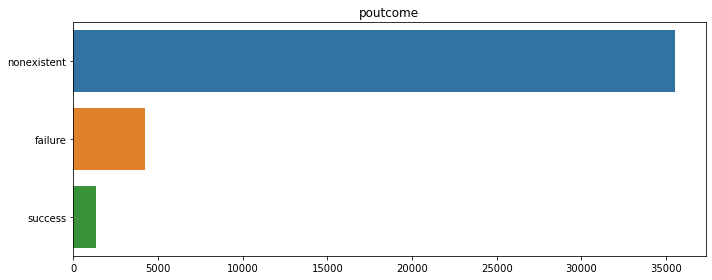

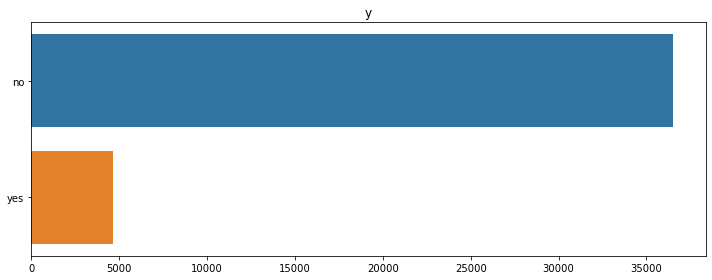

In [28]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

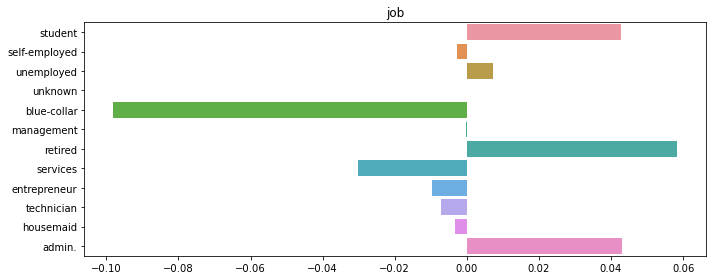

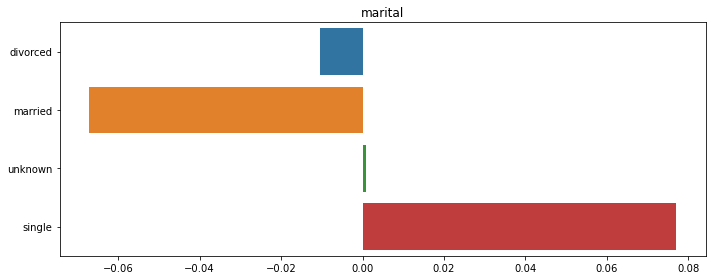

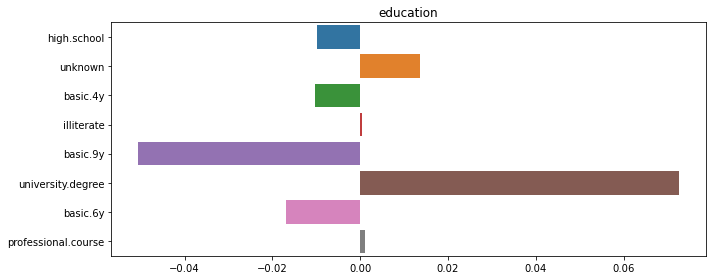

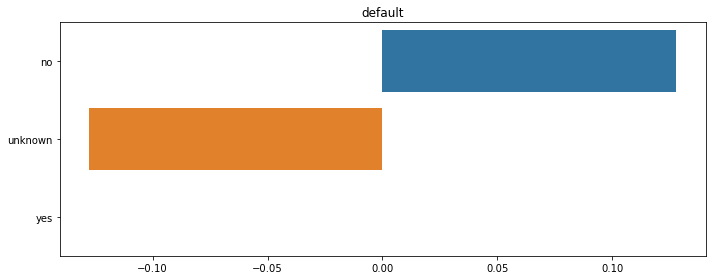

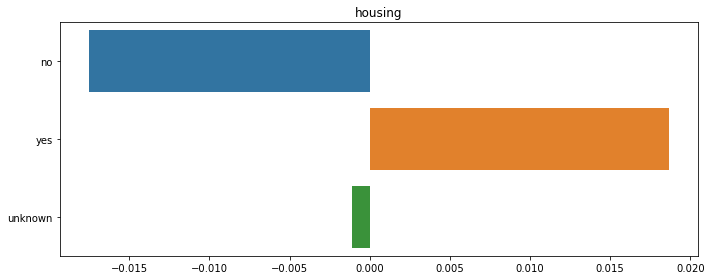

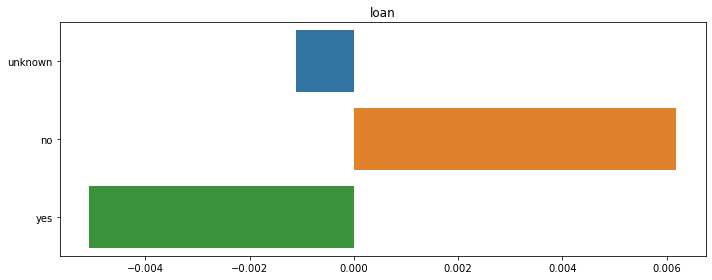

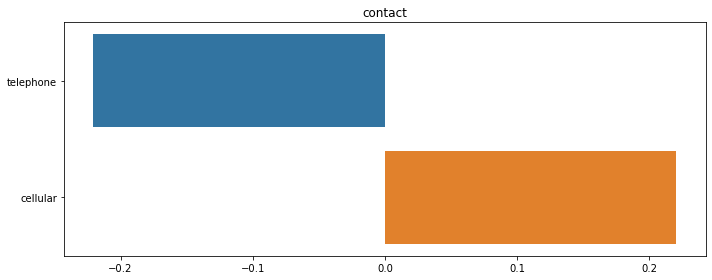

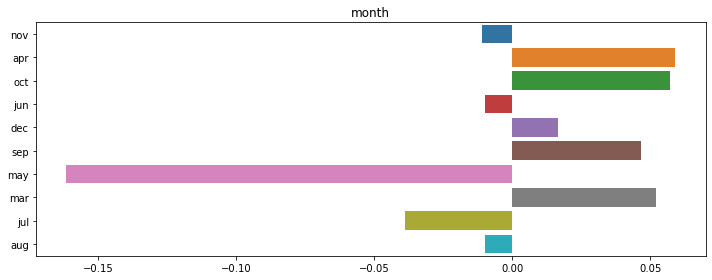

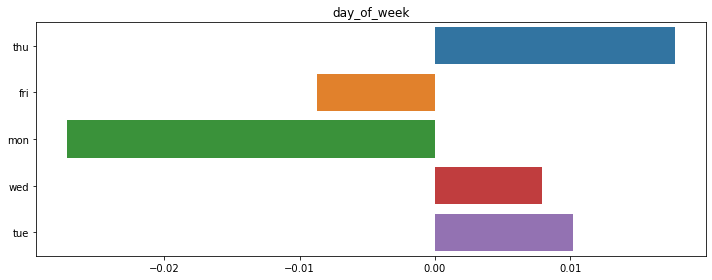

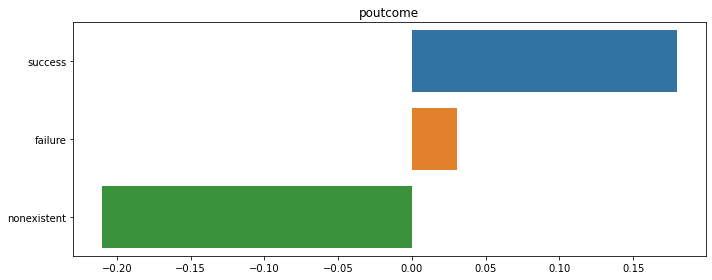

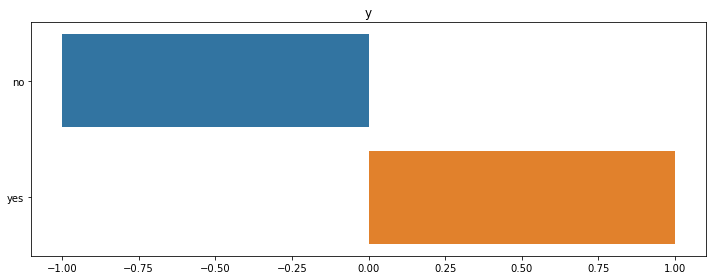

In [29]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [30]:
df.default.replace('unknown','no',inplace=True)
df['default'] = df.default.replace('unknown',df.default.mode([0]))

In [31]:
df.housing.replace('unknown',df.housing.mode()[0],inplace=True)

In [32]:
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])

In [33]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [34]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

In [35]:
df['y'].replace({'no':0,'yes':1},inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,no,telephone,may,mon,...,1,6.014521,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


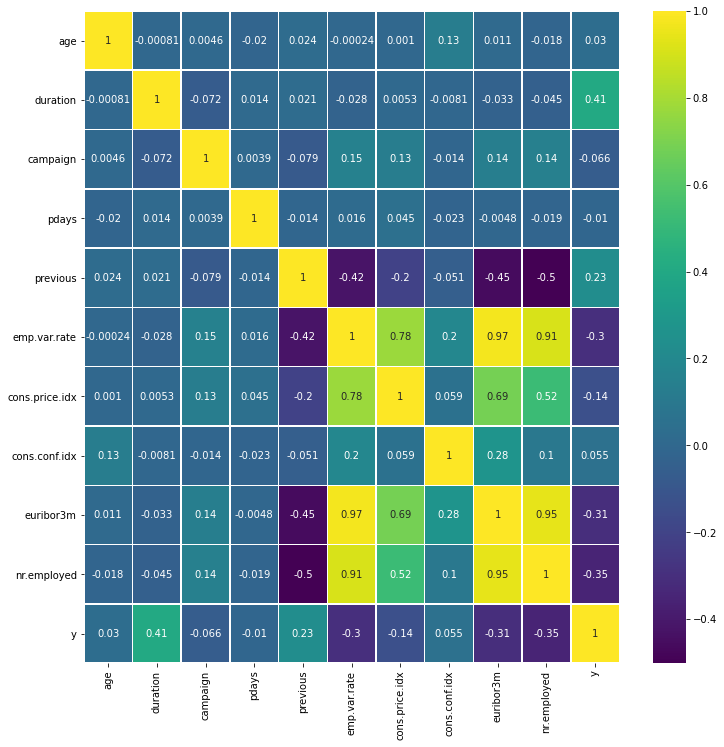

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [39]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

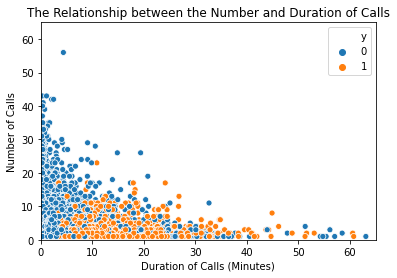

In [40]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

In [41]:
# drop rows where call duration was less than 10 seconds
#dropped 290 rows
#[df.duration < 10/60]
df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)

In [42]:
#putting age into bins
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60

In [43]:
df['pdays'] = np.where(df['pdays'] == 999,df[df['pdays'] < 999]['pdays'].mean(),df['pdays'])

In [44]:
def generate_auc_roc_curve(clf, X_test, Y_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(Y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc=4)
    plt.show()
    pass

In [45]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [47]:
labelenc = LabelEncoder()
df[category_cols] = df[category_cols].apply(LabelEncoder().fit_transform)

In [48]:
X = df.drop(['y','duration'],1)
y = df['y']

In [49]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)

In [50]:
lg_clf=LogisticRegression()

In [51]:
#Fitting on data
lg_clf.fit(X_train, y_train)

#Scoring the model on train data
score_lg_train=lg_clf.score(X_train, y_train)
print("Training score: %.2f " % score_lg_train)

#Scoring the model on test_data
score_lg_test=lg_clf.score(X_test, y_test)
print("Testing score: %.2f " % score_lg_test)

y_pred_lg = lg_clf.predict(X_test)
# y_prob = rf_clf.predict_proba(X_test)
# probs = y_prob[:,1]

Training score: 0.89 
Testing score: 0.90 


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
generate_model_report(y_test, y_pred_lg)

Accuracy =  0.8954019240176097
Precision =  0.5975609756097561
Recall =  0.14550853749072012
F1 Score =  0.23402985074626867


In [56]:
print(confusion_matrix(y_test, y_pred_lg))

[[10787   132]
 [ 1151   196]]


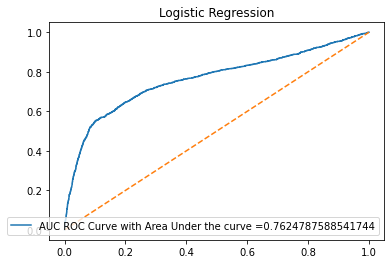

In [54]:
y_pred_proba = lg_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('Logistic Regression')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

In [73]:
lg_clf.coef_

array([[ 2.61996443e-03,  2.20631894e-02,  4.51798539e-02,
         3.92240570e-02, -4.75890726e-05, -7.72455943e-03,
        -4.75890726e-05, -6.65093839e-02, -1.37518668e-01,
         6.54635673e-02, -3.99648485e-02, -3.29696558e-02,
         1.09430640e-01,  1.65262917e-01, -1.72651098e-01,
         3.50093619e-01,  4.07736498e-02, -2.18712569e-01,
        -6.29279361e-03]])

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)

[[9984  935]
 [ 877  470]]
85.0


In [60]:
generate_model_report(y_test, dtreepred)

Accuracy =  0.8522745801402251
Precision =  0.33451957295373663
Recall =  0.3489235337787676
F1 Score =  0.34156976744186046


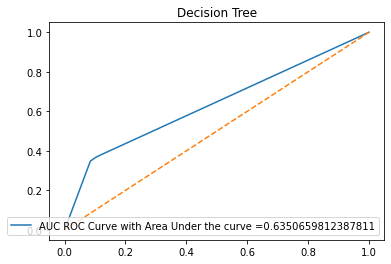

In [59]:
y_pred_proba = dtree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('Decision Tree')
plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

In [61]:
minority_class_len = len(df[df.y == 1])
print(minority_class_len)

4639


In [64]:
minority_class_indices = df[df['y'] == 1].index
print(minority_class_indices)

Int64Index([   75,    83,    88,   129,   139,   182,   286,   388,   389,
              446,
            ...
            41165, 41166, 41171, 41172, 41173, 41174, 41178, 41181, 41183,
            41186],
           dtype='int64', length=4639)


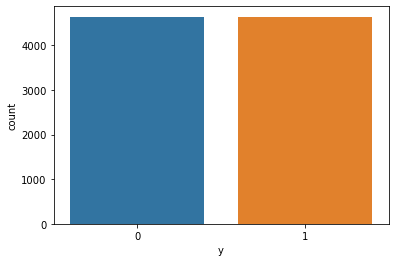

In [65]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
under_sample = df.loc[under_sample_indices]
sns.countplot(x='y', data=under_sample)

In [67]:
X_bl = under_sample.drop(['y','duration'],1)
Y_bl = under_sample.loc[:, df.columns=='y']
X_train_bl, X_test_bl, Y_train_bl, Y_test_bl = train_test_split(X_bl, Y_bl, test_size=0.33, random_state=42)

In [69]:
lg_clf_bl = LogisticRegression().fit(X_train_bl, Y_train_bl)
y_test_logistic_bl = lg_clf_bl.predict(X_test_bl)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
generate_model_report(Y_test_bl, y_test_logistic_bl)

Accuracy =  0.721097322011757
Precision =  0.7597354886113152
Recall =  0.6623959000640615
F1 Score =  0.7077344284736482


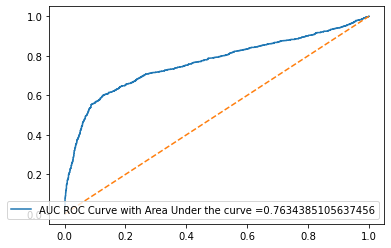

In [72]:
generate_auc_roc_curve(lg_clf_bl, X_test_bl, Y_test_bl)